In [27]:
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx

In [28]:
amenities = gpd.read_file('data/map.geojson')
site = amenities.loc[amenities['Location Type'] == 'Site']

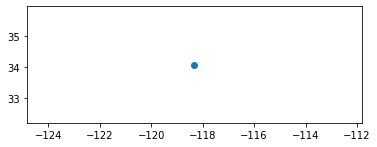

In [29]:
site.plot()

In [30]:
amenities= amenities.to_crs(3857)
site= site.to_crs(3857)
buffer_length_in_meters = (1 * 1000) * 1.60934
site['geometry'] = site.geometry.buffer(buffer_length_in_meters)

In [31]:
amenities['x'] = amenities['geometry'].x
amenities['y'] = amenities['geometry'].y

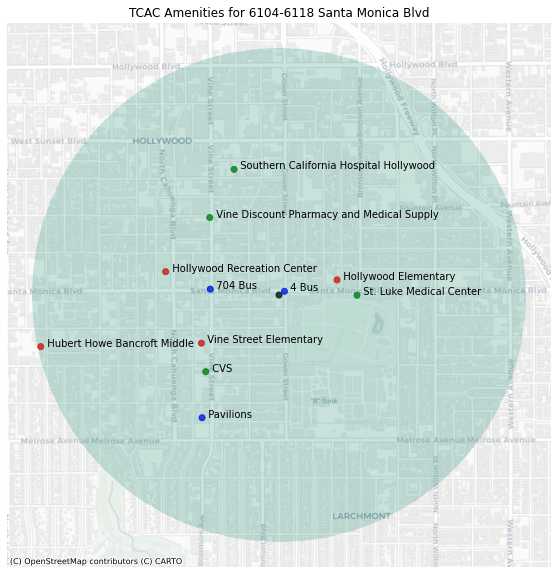

In [35]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add isochrones
amenities.plot(alpha=.8,
               ax=ax,
               color=amenities['marker-color'])

site.plot(alpha=.2,
               ax=ax,
               cmap='summer')

for key, row in amenities.iterrows():
      ax.annotate('  ' + row['Name'], xy=(row['x'], row['y']))
# no axis
ax.axis('off')

# title
ax.set_title('TCAC Amenities for 6104-6118 Santa Monica Blvd')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)